# Решение краевой задачи для волнового уравнения
## Выполнил студент группы МП-30 Новицкий Григорий

## Задача:
Неоднородный разогрев стержня.На левом конце стержня поддерживается постоянная температура Т0, на правом температура меняется по закону: 

$\large T_0+ae^{\big[ \frac{-(t-t_0)^2}{\tau^2}\big]}-ae^{\big[ \frac{-t_0^2}{\tau^2}\big]}$
$t_0>>\tau$



## Параметры:

In [6]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import *
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.integrate as integrate
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = [10.0, 10.0]
default_value = 1;
label0=Label("$\large t_l$ - температуропроводность материала стержня")
label1=Label("$\large T$ - начальная температура")
label2=Label("$\large l$ -длина стержня")
label3=Label("$\large a$ -амплитуда импульса")
label4=Label("$\large t_0$ -время подачи импульса")
label5=Label("$\large t$ -характерное время нарастания/спадания импульса")
field0=widgets.BoundedFloatText(value=default_value,min=0,max=100.0,step=0.01,readout=True,readout_format='.2f')
field1=widgets.BoundedFloatText(value=default_value,min=0,max=100.0,step=0.01,readout=True,readout_format='.2f')
field2=widgets.BoundedFloatText(value=default_value,min=0,max=100.0,step=0.01,readout=True,readout_format='.2f')
field3=widgets.BoundedFloatText(value=default_value,min=0,max=100.0,step=0.01,readout=True,readout_format='.2f')
field4=widgets.BoundedFloatText(value=default_value,min=0,max=100.0,step=0.01,readout=True,readout_format='.2f')
field5=widgets.BoundedFloatText(value=default_value,min=0,max=100.0,step=0.01,readout=True,readout_format='.2f')
field6=widgets.BoundedIntText(value=100,min=50,max=1000,step=100,continuous_update=False,readout=True)
field7=widgets.BoundedIntText(value=100,min=50,max=1000,step=100,continuous_update=False,readout=True)
field8=widgets.BoundedFloatText(value=0.01,min=0,max=0.1,step=0.001,readout=True,readout_format='.2f')
field9=widgets.BoundedFloatText(value=default_value,min=0,max=100,step=0.01,readout=True,readout_format='.2f')
field10=widgets.BoundedFloatText(value=3/8,min=1/4,max=1/2,step=0.01,readout=True,readout_format='.2f')

In [7]:
VBox([HBox([label0,field0]),HBox([label1,field1]),HBox([label2,field2]),HBox([label3,field3]),HBox([label4,field4]),HBox([label5,field5])])

VBox(children=(HBox(children=(Label(value='$\\large t_l$ - температуропроводность материала стержня'), BoundedFloatText(value=1.0, step=0.01))), HBox(children=(Label(value='$\\large T$ - начальная температура'), BoundedFloatText(value=1.0, step=0.01))), HBox(children=(Label(value='$\\large l$ -длина стержня'), BoundedFloatText(value=1.0, step=0.01))), HBox(children=(Label(value='$\\large a$ -амплитуда импульса'), BoundedFloatText(value=1.0, step=0.01))), HBox(children=(Label(value='$\\large t_0$ -время подачи импульса'), BoundedFloatText(value=1.0, step=0.01))), HBox(children=(Label(value='$\\large t$ -характерное время нарастания/спадания импульса'), BoundedFloatText(value=1.0, step=0.01)))))

## Режим работы

In [8]:
toogle = widgets.ToggleButtons(options=['Расчёт заданного числа шагов','Расчёт с заданной точностью'],description='Режим работы:',disabled=False,button_style='')
global mode
mode = 0
def changed(changed):
    global mode
    if mode == 0:
        mode = 1
    else:
        mode = 0
toogle.observe(changed,'value')
VBox([toogle,
HBox([Label('Количество шагов по $x$:'),field6]),HBox([Label('Количество шагов по $t$:'),field7]),HBox([Label('Точность:'),field8]),HBox([Label('Время симуляции:'),field9]),
     HBox([Label('Параметр $\sigma$ неявной схемы:'),field10])])

VBox(children=(ToggleButtons(description='Режим работы:', options=('Расчёт заданного числа шагов', 'Расчёт с заданной точностью'), value='Расчёт заданного числа шагов'), HBox(children=(Label(value='Количество шагов по $x$:'), BoundedIntText(value=100, max=1000, min=50, step=100))), HBox(children=(Label(value='Количество шагов по $t$:'), BoundedIntText(value=100, max=1000, min=50, step=100))), HBox(children=(Label(value='Точность:'), BoundedFloatText(value=0.01, max=0.1, step=0.001))), HBox(children=(Label(value='Время симуляции:'), BoundedFloatText(value=1.0, step=0.01))), HBox(children=(Label(value='Параметр $\\sigma$ неявной схемы:'), BoundedFloatText(value=0.375, max=0.5, min=0.25, step=0.01)))))

## Начальные и гарничные условия

## U(t,0)

In [11]:
amp=field3.value
inp_time_0=field4.value
inp_time=field5.value
inp_temp_0=field1.value
def psi1(t):
    return 0

## U(t,l)

In [560]:
def psi2(t):
    return inp_temp_0+amp*np.exp(-(t-inp_time_0)**2/(2*inp_time**2))-amp*np.exp(-(inp_time_0)**2/(2*inp_time**2))

## U(0,x)

In [561]:
l=field2.value
def f1(x):
    return inp_temp_0

## U'(0,x)

In [562]:
def f2(x):
    return 0

## F(t,x)

In [563]:
def F(t,x):
    return 0
def F1(t,x):
    return integrate.quad(F,0,t,args=(x))[0]+f2(x)

## Решение с использованием неявной шеститочечной параметрической схемы

In [564]:
def Progonka(M,V):
    A=np.zeros(M.shape[0])
    B=np.zeros(M.shape[0])
    R=np.zeros((M.shape[0],1))
    A[0]=-1*M[0,1]/M[0,0]
    B[0]=V[0]/M[0,0]
    for i in range(1,M.shape[0]-1):
        A[i]=-M[i,i+1]/[M[i,i]+M[i,i-1]*A[i-1]]
        B[i]=(V[i]-M[i,i-1]*B[i-1])/[M[i,i]+M[i,i-1]*A[i-1]]
    i = M.shape[0]-1
    R[i]=(V[i]-M[i,i-1]*B[i-1])/[M[i,i]+M[i,i-1]*A[i-1]]
    for i in range(M.shape[0]-2,-1,-1):
        R[i]=A[i]*R[i+1]+B[i]
    return R

In [565]:
pl=field0.value
T=field1.value
l=field2.value
amp=field3.value
inp_time_0=field4.value
inp_time=field5.value
x_count = field6.value
t_count = field7.value
requared_acc = field8.value
max_time = field9.value
a=np.sqrt(T/pl)
h=l/x_count
tau=max_time/t_count
cur_acc = 1
iteration = 0
MAX_ITER=8
sigma = field10.value
if psi1(0)==f1(0) and psi2(0)==f1(l):
    while (requared_acc<cur_acc or iteration<2) and iteration <MAX_ITER:
        x = np.linspace(0,l,x_count,dtype=np.longdouble)
        timeline = np.linspace(0,max_time,t_count,dtype=np.longdouble)
        U = np.zeros((t_count,x_count))
        M = np.zeros((x_count-2,x_count-2),dtype=np.float32)
        A = np.zeros((x_count-3),dtype=np.longdouble)
        B = np.zeros((x_count-3),dtype=np.longdouble)
        print("Итерация ",iteration+1,'запушена',"\nКоличество шагов сетки:",
              "\n   По времени:",t_count," ","\n   По координате:",x_count)
        V = np.zeros((x_count-2),dtype=np.float32)
        h2 = h*h
        tau2 = tau*tau
        const1 = (a/h)**2
        for i in range (t_count):#Задаём граничные условия
            U[i][0]=psi1(timeline[i])
            U[i][x_count-1]=psi2(timeline[i])
        for i in range (1,x_count-1):#Задаём начальные условия
            U[0][i]=f1(x[i])
            U[1][i]=U[0][i]+tau*f2(x[i])+tau**2/2*(a**2*(f1(x[i-1])-2*f1(x[i])+f1(x[i+1]))/h**2+F(0,x[i]))
        for i in range(1,t_count-1):
            for j in range(1,x_count-1):
                M[j-1][j-1]=1/tau2+2*sigma*const1
                V[j-1]=(F(timeline[i],x[j])
                +(2*U[i][j]-U[i-1][j])/tau2
                +sigma*const1*(U[i-1][j+1]-2*U[i-1][j]+U[i-1][j-1])
                +(1-2*sigma)*const1*(U[i][j+1]-2*U[i][j]+U[i][j-1]))
            for j in range(1,x_count-2):
                M[j-1][j]=-1*sigma*const1
                M[j][j-1]=-1*sigma*const1
            V[0]=V[0]+sigma*const1*U[i+1][0]
            V[x_count-3]=V[x_count-3]+sigma*const1*U[i+1][x_count-1]
            C=Progonka(M,V)
            for i1 in range(1,x_count-1):
                U[i+1][i1]=C[i1-1]
        if iteration>0:
            for i in range(0,prev_t_count):
                for j in range(0,prev_x_count):
                    U2[i][j]=U[2*i][2*j]
            C = abs(Pr_U-U2)
            v=-1
            for t in C:
                v = max(max(t),v)
            cur_acc=v;
            print("Итерация",iteration+1,"завершилась")
            if mode == 0:
                break
        Pr_U = np.copy(U)
        U2 = np.zeros((t_count,x_count))
        prev_t_count = t_count
        prev_x_count = x_count
        x_count*=2
        t_count*=2
        h=l/x_count
        tau=max_time/t_count
        iteration+=1
        print("Итерация",iteration,"завершилась",'\n')
else:
    print("Ошибка. Граничные и начальные условия не согласованы!!!!")
print("\nДостигнута nочность:",cur_acc)
#if mode == 1:
#   solve_grid_params = (t_count,x_count)
#else:
#    solve_grid_params = (init_t_count,init_x_count)
#    U=np.copy(Pr_U)

Итерация  1 запушена 
Количество шагов сетки: 
   По времени: 100   
   По координате: 100
Итерация 1 завершилась 

Итерация  2 запушена 
Количество шагов сетки: 
   По времени: 200   
   По координате: 200
Итерация 2 завершилась

Достигнута nочность: 0.00559513214409


In [566]:
anim_speed=widgets.FloatSlider(
    value=3,
    min=0.1,
    max=20,
    step=0.1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='f'
)
VBox([Label('Длительность анимации'),anim_speed])

VBox(children=(Label(value='Длительность анимации'), FloatSlider(value=3.0, max=20.0, min=0.1, readout_format='f')))

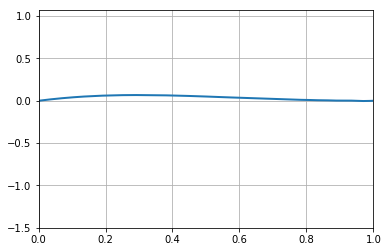

In [567]:
%matplotlib inline 
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in U]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in U]
maxv=max(maxv)
fig, ax = plt.subplots()
ax.set_xlim(0,l)
ax.set_ylim(minv-1,maxv+1)
ax.grid(True)
line, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
    line.set_data(x, U[i])
    return (line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=U.shape[0], interval=1000/U.shape[0]*anim_speed.value, blit=True)
# equivalent to rcParams['animation.html'] = 'html5'

rc('animation', html='html5')
anim

<IPython.core.display.Javascript object>


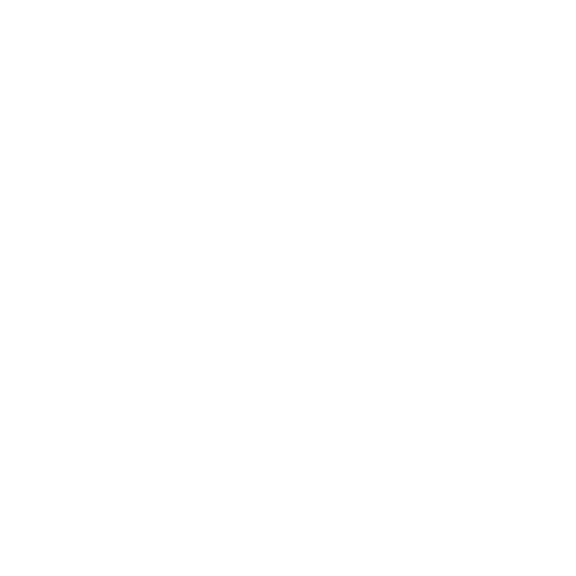

VBox(children=(HBox(children=(IntSlider(value=0, description='Step:', max=199), Label(value=''))), HBox(children=(BoundedFloatText(value=0.0, continuous_update=True, description='Time:', max=1.0, step=0.1), Label(value='')))))

In [568]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
w=widgets.IntSlider(
    value=0,
    min=0,
    max=U.shape[0]-1,
    step=1,
    description='Step:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
w1 = widgets.BoundedFloatText(
    value=0,
    min=0,
    max=max_time,
    step=0.1,
    continuous_update=True,
    description='Time:',
    disabled=False
)
global z 
z = Label()
global z1 
z1 = Label()
def pltsin(i):
    global ax1
    global fig1
    global z
    x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
    timeline=np.linspace(0,max_time,U.shape[0],dtype=np.longdouble)
    if ax1.lines:
        for line in ax1.lines:
            line.set_xdata(x)
            y = U[i['new']]
            line.set_ydata(y)
    else:
        y = U[0]
        ax1.plot(x, y)
    z.value="Time:"+str(timeline[i['new']])
    w.value=i['new']
    fig1.canvas.draw()
def pltsin1(t):
    global ax1
    global fig1
    global z
    x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
    timeline=np.linspace(0,max_time,U.shape[0],dtype=np.longdouble)
    t = t['new']
    minv = 1000000
    mini=0
    p=abs(timeline-t)
    for i in range(len(p)):
        if p[i]<minv:
            minv = p[i]
            mini = i
    pltsin({'new': mini})

%matplotlib notebook
global ax1
global fig1
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in U]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in U]
maxv=max(maxv)
w.observe(pltsin,'value')
w1.observe(pltsin1,'value')
fig1,ax1 = plt.subplots(1,1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(( 0, l))
ax1.set_ylim((minv-1,maxv+1))
x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
ax1.plot(x,U[0])
ax1.grid(True)
VBox([HBox([w,z]),HBox([w1,z1])])

## Явная схема

In [569]:
pl=field0.value
T= field1.value
l=field2.value
amp=field3.value
Inp_time_0=field4.value
Inp_time=field5.value
x_count = field6.value
t_count = field7.value
requared_acc = field8.value
max_time = field9.value
a=np.sqrt(T/pl)
h=l/x_count
tau=max_time/t_count
cur_acc = 1
iteration = 0
if a*tau/h<=1:
    while (requared_acc<cur_acc or iteration<2) and iteration <8:
        x = np.linspace(0,l,x_count,dtype=np.longdouble)
        timeline = np.linspace(0,max_time,t_count,dtype=np.longdouble)
        U = np.zeros((t_count,x_count))
        V = np.zeros((t_count,x_count))
        h2 = h*h
        tau2 = tau*tau
        const1 = (a/h)**2
        print("Итерация ",iteration+1,'запушена',"\nКоличество шагов сетки:","\n   По времени:",t_count," ","\n   По координате:",x_count)
        for i in range (t_count): #Задаём граничные условия
            U[i][0]=psi1(timeline[i])
            U[i][x_count-1]=psi2(timeline[i])
        for i in range (0,x_count): #Задаём начальные условия
            U[0][i]=f1(x[i])
        for i in range(0,t_count-1):
            for j in range(1,x_count-1):
                U[i+1][j]=tau*(F1(timeline[i],x[j])+a**2*tau*(U[i][j+1]-2*U[i][j]+U[i][j-1])/2/(h**2)+a*(V[i][j+1]-V[i][j-1])/(2*h))+U[i][j]
                V[i+1][j]=tau*(a**2*tau*(V[i][j+1]-2*V[i][j]+V[i][j-1])/(2*h**2)+a*(U[i][j+1]-U[i][j-1])/(2*h))+V[i][j]
            V[i+1][0]=V[i][0]+a*tau*(U[i][1]-U[i][0])/h
            V[i+1][x_count-1]=V[i][x_count-1]+a*tau*(U[i][x_count-1]-U[i][x_count-2])/h
        if iteration>0:
            for i in range(0,prev_t_count):
                for j in range(0,prev_x_count):
                    U2[i][j]=U[2*i][2*j]
            C = abs(Pr_U-U2)
            v=-1
            for t in C:
                v = max(max(t),v)
            cur_acc=v;
            if mode == 0:
                break
        Pr_U = np.copy(U)
        U2 = np.zeros((t_count,x_count))
        prev_t_count = t_count
        prev_x_count = x_count
        x_count*=2
        t_count*=2
        h=l/x_count
        tau=max_time/t_count
        iteration+=1
        print("Итерация",iteration," завершена",'\n')
    print('\nДостигнута точность:',cur_acc)
else:
    print('При заданных параметрах схема не устойчива')

Итерация  1 запушена 
Количество шагов сетки: 
   По времени: 100   
   По координате: 100
Итерация 1  завершена 

Итерация  2 запушена 
Количество шагов сетки: 
   По времени: 200   
   По координате: 200

Достигнута точность: 0.00318076300909


In [570]:
anim_speed=widgets.FloatSlider(
    value=3,
    min=0.1,
    max=20,
    step=0.1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='f'
)
VBox([Label('Длительность анимации'),anim_speed])

VBox(children=(Label(value='Длительность анимации'), FloatSlider(value=3.0, max=20.0, min=0.1, readout_format='f')))

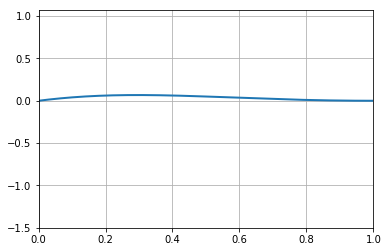

In [571]:
%matplotlib inline 
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in U]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in U]
maxv=max(maxv)
fig, ax = plt.subplots()
ax.set_xlim(0,l)
ax.set_ylim(minv-1,maxv+1)
ax.grid(True)
line, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
    line.set_data(x, U[i])
    return (line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=U.shape[0], interval=1000/U.shape[0]*anim_speed.value, blit=True)
# equivalent to rcParams['animation.html'] = 'html5'

rc('animation', html='html5')
anim

<IPython.core.display.Javascript object>


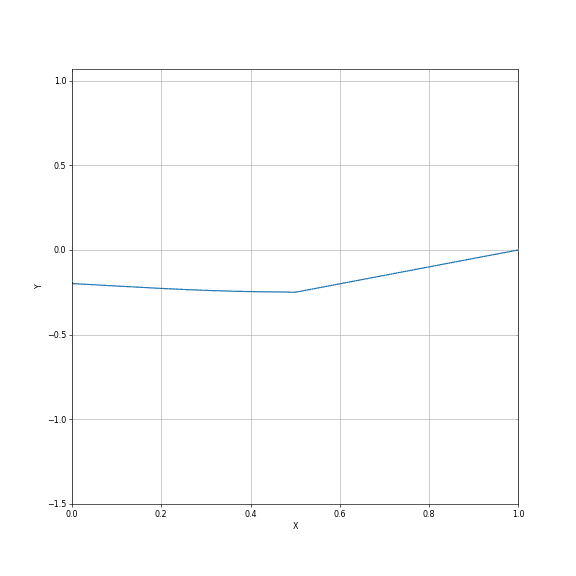

VBox(children=(HBox(children=(IntSlider(value=0, description='Step:', max=199), Label(value=''))), HBox(children=(BoundedFloatText(value=0.0, continuous_update=True, description='Time:', max=1.0, step=0.1), Label(value='')))))

In [572]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
w=widgets.IntSlider(
    value=0,
    min=0,
    max=U.shape[0]-1,
    step=1,
    description='Step:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
w1 = widgets.BoundedFloatText(
    value=0,
    min=0,
    max=max_time,
    step=0.1,
    continuous_update=True,
    description='Time:',
    disabled=False
)
global z 
z = Label()
global z1 
z1 = Label()
def pltsin(i):
    global ax1
    global fig1
    global z
    x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
    timeline=np.linspace(0,max_time,U.shape[0],dtype=np.longdouble)
    if ax1.lines:
        for line in ax1.lines:
            line.set_xdata(x)
            y = U[i['new']]
            line.set_ydata(y)
    else:
        y = U[0]
        ax1.plot(x, y)
    z.value="Time:"+str(timeline[i['new']])
    w.value=i['new']
    fig1.canvas.draw()
def pltsin1(t):
    global ax1
    global fig1
    global z
    x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
    timeline=np.linspace(0,max_time,U.shape[0],dtype=np.longdouble)
    t = t['new']
    minv = 1000000
    mini=0
    p=abs(timeline-t)
    for i in range(len(p)):
        if p[i]<minv:
            minv = p[i]
            mini = i
    pltsin({'new': mini})

%matplotlib notebook
global ax1
global fig1
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in U]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in U]
maxv=max(maxv)
w.observe(pltsin,'value')
w1.observe(pltsin1,'value')
fig1,ax1 = plt.subplots(1,1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(( 0, l))
ax1.set_ylim((minv-1,maxv+1))
x = np.linspace(0,l,U.shape[1],dtype=np.longdouble)
ax1.plot(x,U[0])
ax1.grid(True)
VBox([HBox([w,z]),HBox([w1,z1])])

## DON'T TOUCH